In [6]:
from titrato.reports import SAMPL6DataProvider, SAMPL6ReportGenerator

In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


from titrato.reports import SAMPL6DataProvider, SAMPL6ReportGenerator
from titrato.stats import area_curve_vectorized, area_between_curves, BootstrapDistribution
import seaborn as sns
import logging
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

logger = logging.getLogger()
logger.setLevel(logging.INFO)
from titrato.reports import log
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


# In[4]:


epiktypei = SAMPL6DataProvider("typeI-raw-microscopic.csv", "typei", "Epik-micropka", bootstrap_options={"n_samples": 1})
#epiktypeiii = SAMPL6DataProvider("Epik/typeIII-raw-sequential.csv", "typeiii", "Epik-scan", bootstrap_options={"n_samples": 1}, typeiii_charge_file="Epik/output/sequential/charges_at_pH_7.csv")
jaguartypei = SAMPL6DataProvider("typeI-raw-jaguar.csv", "typei", "Jaguar", bootstrap_options={"n_samples": 1})
exp = SAMPL6DataProvider("SAMPL6_experimental_pkas.csv", "exp", "Experiment", bootstrap_options={"n_samples": 3})

SM07_exp = exp.load("SM07")
SM07_epik_pka = epiktypei.load("SM07")
SM07_jag = jaguartypei.load("SM07")

# show properties as example

SM07_jag.__dict__



{'free_energies': array([[28.92046877, 28.69021026, 28.45995175, ...,  6.35513486,
          6.12487635,  5.89461784],
        [11.90436493, 11.90436493, 11.90436493, ..., 11.90436493,
         11.90436493, 11.90436493],
        [-7.34524645, -7.11498794, -6.88472943, ..., 15.22008746,
         15.45034597, 15.68060448],
        ...,
        [ 3.96044636,  4.42096338,  4.8814804 , ..., 49.09111418,
         49.5516312 , 50.01214822],
        [23.5093938 , 23.96991082, 24.43042784, ..., 68.64006162,
         69.10057864, 69.56109566],
        [26.43367687, 27.1244524 , 27.81522792, ..., 94.1296786 ,
         94.82045413, 95.51122966]]),
 'populations': array([[1.59793637e-16, 2.53218375e-16, 4.01248913e-16, ...,
         1.73438633e-03, 2.18248305e-03, 2.74603171e-03],
        [3.92246865e-09, 4.93736481e-09, 6.21460985e-09, ...,
         6.74754581e-06, 6.74451739e-06, 6.74070851e-06],
        [8.98585654e-01, 8.98452698e-01, 8.98284424e-01, ...,
         2.44988581e-07, 1.94514006e-07

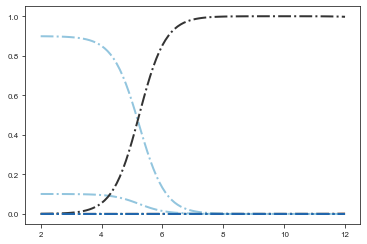

In [9]:

for s, state in enumerate(SM07_jag.state_ids):
    charge = SM07_jag.charges[s]
    label = state + "-jaguar"
#     if np.mean(SM07_jag.populations[s]) < 0.001:
#         continue
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM07_jag.ph_values, SM07_jag.populations[s],lw=2, ls='-.', color=color, label=label)

In [11]:
SM07_jag.populations

array([[1.59793637e-16, 2.53218375e-16, 4.01248913e-16, ...,
        1.73438633e-03, 2.18248305e-03, 2.74603171e-03],
       [3.92246865e-09, 4.93736481e-09, 6.21460985e-09, ...,
        6.74754581e-06, 6.74451739e-06, 6.74070851e-06],
       [8.98585654e-01, 8.98452698e-01, 8.98284424e-01, ...,
        2.44988581e-07, 1.94514006e-07, 1.54420711e-07],
       ...,
       [1.10550187e-05, 8.78001418e-06, 6.97290694e-06, ...,
        4.77689661e-22, 3.01266525e-22, 1.89978978e-22],
       [3.57733392e-14, 2.84115690e-14, 2.25638846e-14, ...,
        1.54577344e-30, 9.74879367e-31, 6.14759923e-31],
       [1.92114206e-15, 1.21197934e-15, 7.64564042e-16, ...,
        1.31566658e-41, 6.59099343e-42, 3.30145626e-42]])

In [12]:
SM07_jag.free_energies

array([[28.92046877, 28.69021026, 28.45995175, ...,  6.35513486,
         6.12487635,  5.89461784],
       [11.90436493, 11.90436493, 11.90436493, ..., 11.90436493,
        11.90436493, 11.90436493],
       [-7.34524645, -7.11498794, -6.88472943, ..., 15.22008746,
        15.45034597, 15.68060448],
       ...,
       [ 3.96044636,  4.42096338,  4.8814804 , ..., 49.09111418,
        49.5516312 , 50.01214822],
       [23.5093938 , 23.96991082, 24.43042784, ..., 68.64006162,
        69.10057864, 69.56109566],
       [26.43367687, 27.1244524 , 27.81522792, ..., 94.1296786 ,
        94.82045413, 95.51122966]])

In [13]:
SM07_jag.ph_values

array([ 2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,
        3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,
        4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,
        5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,
        6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,
        7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,
        8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,
        9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7,
       10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8,
       11.9, 12. ])

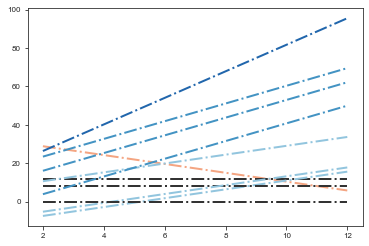

In [18]:
for s, state in enumerate(SM07_jag.state_ids):
    charge = SM07_jag.charges[s]
    label = state + "-jaguar"
#     if np.mean(SM07_jag.populations[s]) < 0.001:
#         continue
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM07_jag.ph_values, SM07_jag.free_energies[s],lw=2, ls='-.', color=color, label=label)

In [19]:
SM07_jag.state_ids

['SM07_micro012',
 'SM07_micro002',
 'SM07_micro006',
 'SM07_micro003',
 'SM07_micro007',
 'SM07_micro004',
 'SM07_micro011',
 'SM07_micro013',
 'SM07_micro014',
 'SM07_micro015',
 'SM07_micro016']

In [21]:
len(SM07_jag.free_energies[0])

101

In [22]:
len(SM07_jag.ph_values)

101

In [26]:
SM07_exp.charges

array([0, 1])

In [27]:
SM07_exp.free_energies

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [28]:
SM07_exp.pkas

array([6.08])

In [29]:
SM07_exp.state_ids

['Deprotonated', '+1 protons (pKa=6.08)']